In [3]:
from lightkurve import KeplerTargetPixelFile
import matplotlib.pyplot as plt

C:\Users\tulik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [4]:
from lightkurve import search_lightcurvefile

In [5]:
pwd

'C:\\Users\\tulik\\OneDrive\\Desktop\\roto-project'

In [6]:
from lightkurve import KeplerLightCurveFile

In [7]:
path ="C:/Users/tulik/OneDrive/Desktop/roto-project/MAST_2025-10-23T2232/MAST_2025-10-23T2232/Kepler/kplr005110407_lc_Q001111011101110111/kplr005110407_lc_Q001111011101110111_all_files/005110407/kplr005110407-2009259160929_llc.fits"

C:\Users\tulik\AppData\Local\Temp\ipykernel_33368\3165316469.py:3: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lcfile.PDCSAP_FLUX.remove_nans()


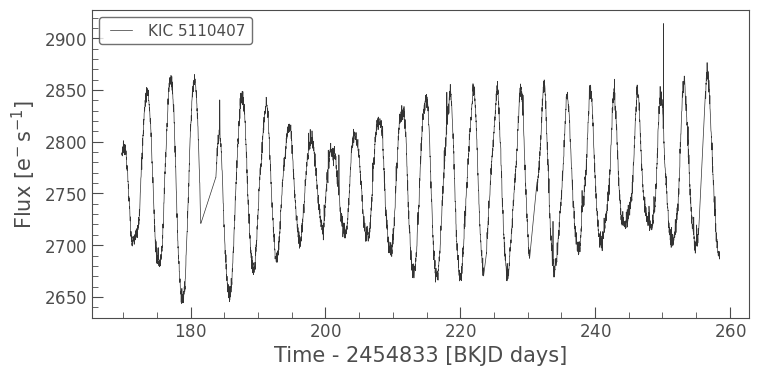

In [8]:
lcfile = KeplerLightCurveFile(path)

lc = lcfile.PDCSAP_FLUX.remove_nans()

lc.plot()
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.timeseries import LombScargle

In [10]:
# --- Load Kepler light curve file ---
hdul = fits.open(path)
data = hdul[1].data


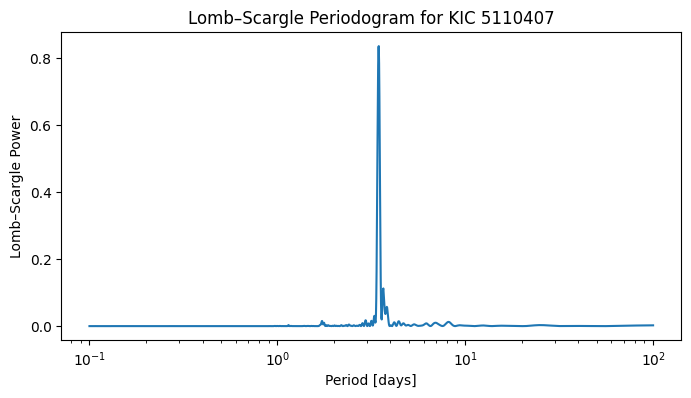

Strongest period = 3.47 days


In [11]:
mask = np.isfinite(data['TIME']) & np.isfinite(data['PDCSAP_FLUX'])
time = data['TIME'][mask]
flux = data['PDCSAP_FLUX'][mask]
flux = flux / np.nanmedian(flux) - 1  # normalize to fractional variations

# --- Compute Lomb–Scargle ---
frequency, power = LombScargle(time, flux).autopower(
    minimum_frequency=1/100,   # periods up to ~100 days
    maximum_frequency=1/0.1,   # periods down to ~0.1 days
    samples_per_peak=10
)

# --- Plot periodogram ---
plt.figure(figsize=(8,4))
plt.plot(1/frequency, power)
plt.xlabel("Period [days]")
plt.ylabel("Lomb–Scargle Power")
plt.title("Lomb–Scargle Periodogram for KIC 5110407")
plt.xscale("log")
plt.show()

# --- Find strongest period ---
best_period = 1 / frequency[np.argmax(power)]
print(f"Strongest period = {best_period:.2f} days")